In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import squarify  # for treemaps

In [3]:
# Load the dataset 
data_path = 'deliveries.csv' # Replace with your dataset path 
deliveries_df = pd.read_csv(data_path) # Remove rows with match_id <= 59 
filtered_deliveries_df = deliveries_df[deliveries_df['match_id'] > 59] # Save the filtered DataFrame to a new CSV file if needed 
filtered_data_path = 'filtered_deliveries.csv' 
filtered_deliveries_df.to_csv(filtered_data_path, index=False) # Display the first few rows of the filtered DataFrame 
print(filtered_deliveries_df.head())

       match_id  inning           batting_team                 bowling_team  \
13862        60       1  Kolkata Knight Riders  Royal Challengers Bangalore   
13863        60       1  Kolkata Knight Riders  Royal Challengers Bangalore   
13864        60       1  Kolkata Knight Riders  Royal Challengers Bangalore   
13865        60       1  Kolkata Knight Riders  Royal Challengers Bangalore   
13866        60       1  Kolkata Knight Riders  Royal Challengers Bangalore   

       over  ball      batsman  non_striker   bowler  is_super_over  ...  \
13862     1     1   SC Ganguly  BB McCullum  P Kumar              0  ...   
13863     1     2  BB McCullum   SC Ganguly  P Kumar              0  ...   
13864     1     3  BB McCullum   SC Ganguly  P Kumar              0  ...   
13865     1     4  BB McCullum   SC Ganguly  P Kumar              0  ...   
13866     1     5  BB McCullum   SC Ganguly  P Kumar              0  ...   

       bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_run

In [5]:
data_path = 'matches.csv' # Replace with your dataset path 
deliveries_df = pd.read_csv(data_path) # Remove rows with match_id <= 59 
filtered_deliveries_df = deliveries_df[deliveries_df['id'] > 59] # Save the filtered DataFrame to a new CSV file if needed 
filtered_data_path = 'filtered_matches.csv' 
filtered_deliveries_df.to_csv(filtered_data_path, index=False) # Display the first few rows of the filtered DataFrame 
print(filtered_deliveries_df.head())

    id  season        city        date                  team1  \
59  60    2008   Bangalore  2008-04-18  Kolkata Knight Riders   
60  61    2008  Chandigarh  2008-04-19    Chennai Super Kings   
61  62    2008       Delhi  2008-04-19       Rajasthan Royals   
62  63    2008      Mumbai  2008-04-20         Mumbai Indians   
63  64    2008     Kolkata  2008-04-20        Deccan Chargers   

                          team2                  toss_winner toss_decision  \
59  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
60              Kings XI Punjab          Chennai Super Kings           bat   
61             Delhi Daredevils             Rajasthan Royals           bat   
62  Royal Challengers Bangalore               Mumbai Indians           bat   
63        Kolkata Knight Riders              Deccan Chargers           bat   

    result  dl_applied                       winner  win_by_runs  \
59  normal           0        Kolkata Knight Riders          140   
60  

/var/folders/pv/byryysg97h9dgc4sfsdqc_tm0000gn/T/ipykernel_53488/2558112630.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette="viridis")


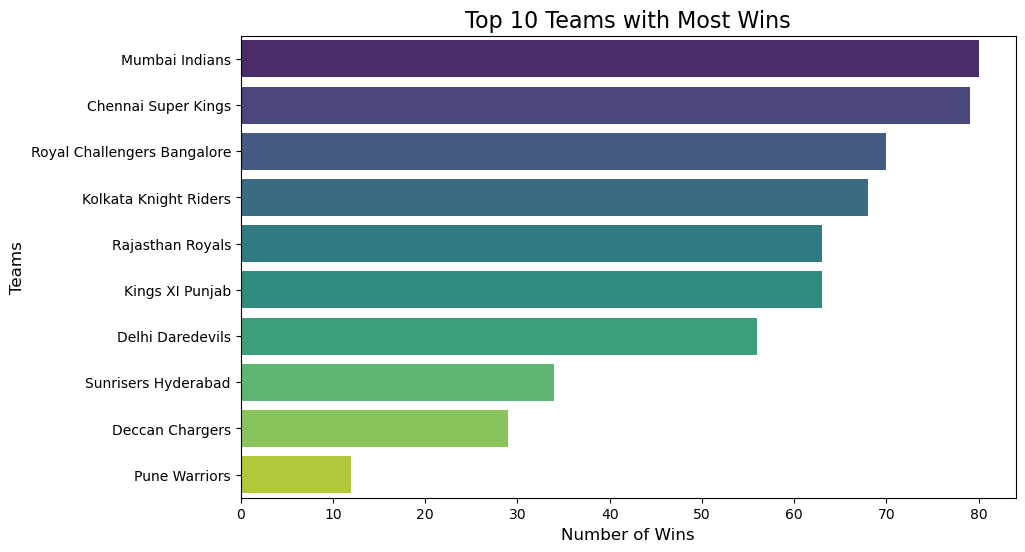

In [7]:
# Load the datasets
deliveries_path = "filtered_deliveries.csv"  # Replace with the path to your deliveries file
matches_path = "filtered_matches.csv"  # Replace with the path to your matches file

deliveries_df = pd.read_csv(deliveries_path)
matches_df = pd.read_csv(matches_path)

# Missing value analysis
deliveries_missing = deliveries_df.isnull().sum()
matches_missing = matches_df.isnull().sum()

# Plot: Teams with most wins
top_teams = matches_df['winner'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_teams.values, y=top_teams.index, palette="viridis")
plt.title("Top 10 Teams with Most Wins", fontsize=16)
plt.xlabel("Number of Wins", fontsize=12)
plt.ylabel("Teams", fontsize=12)
plt.show()



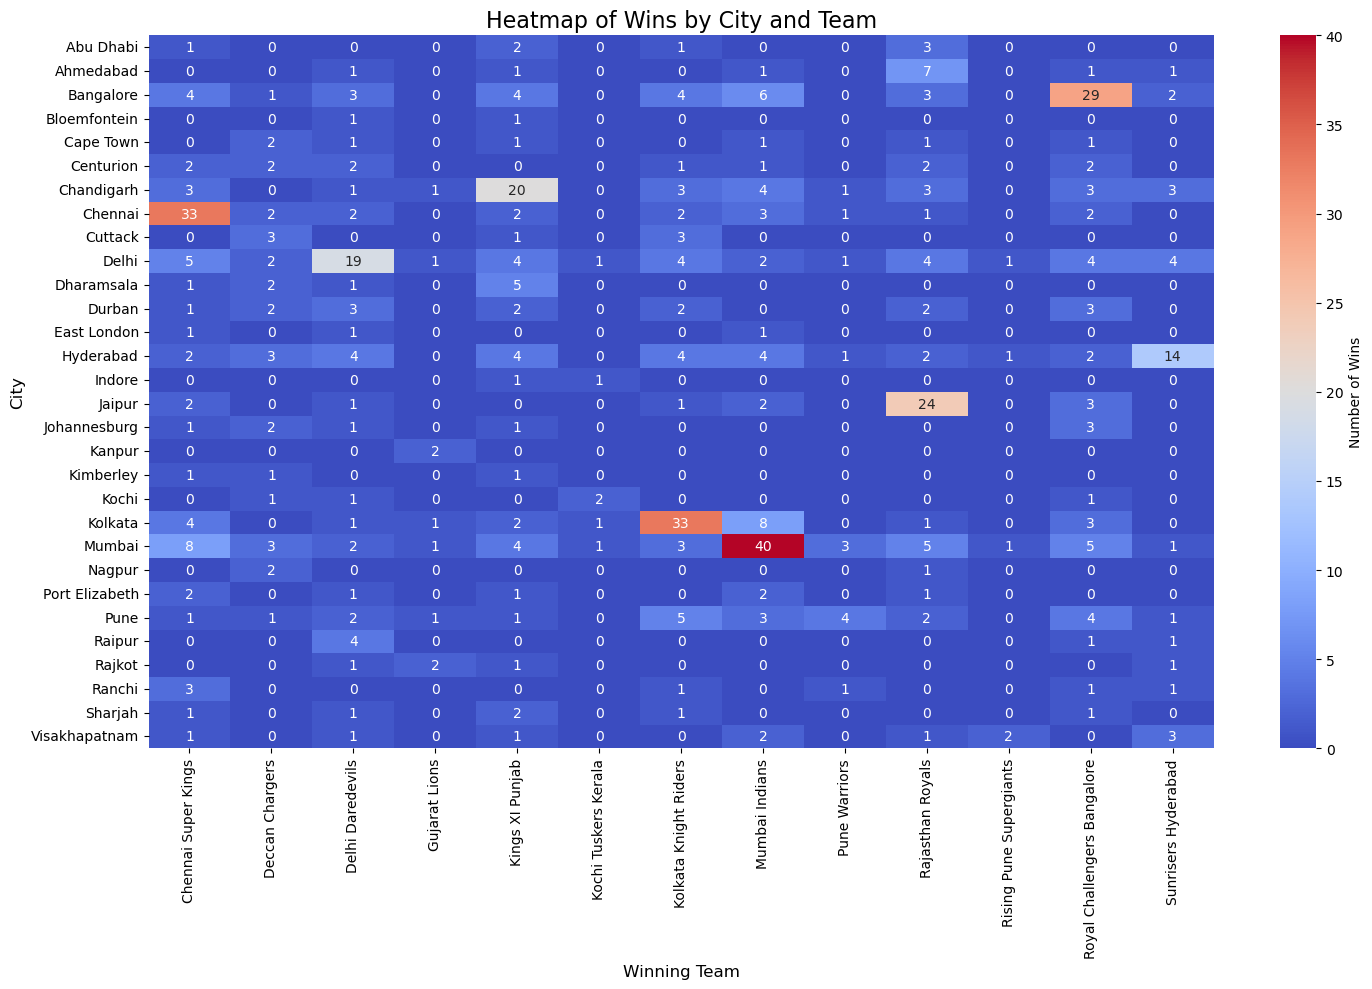

In [9]:
# Group data to calculate the number of wins for each team in each city
city_team_wins = matches_df.groupby(['city', 'winner']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(city_team_wins, annot=True, fmt='d', cmap='coolwarm', cbar_kws={'label': 'Number of Wins'})

# Add titles and labels
plt.title('Heatmap of Wins by City and Team', fontsize=16)
plt.xlabel('Winning Team', fontsize=12)
plt.ylabel('City', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

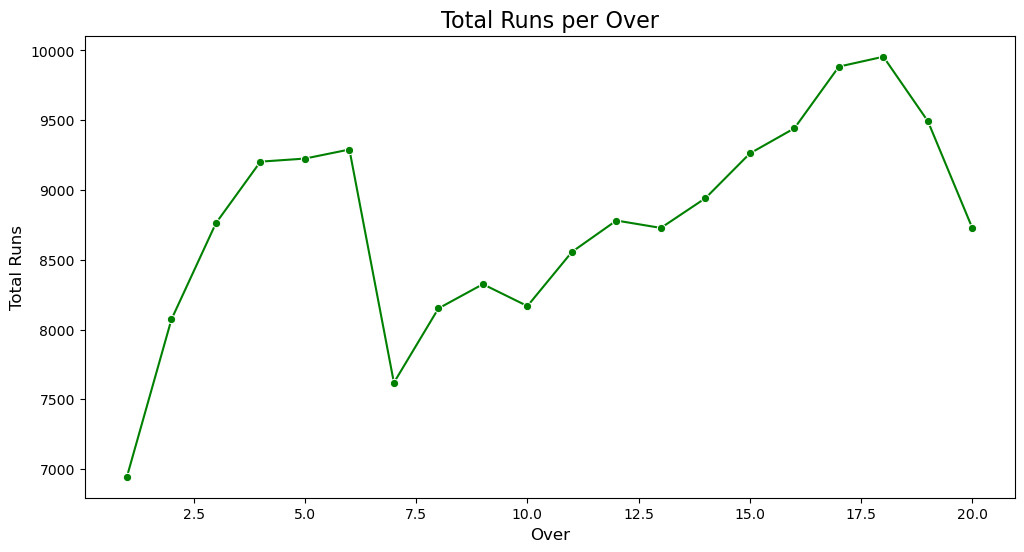

In [11]:
# Total runs per over
runs_per_over = deliveries_df.groupby('over')['total_runs'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=runs_per_over.index, y=runs_per_over.values, marker='o', color="green")
plt.title("Total Runs per Over", fontsize=16)
plt.xlabel("Over", fontsize=12)
plt.ylabel("Total Runs", fontsize=12)
plt.show()


/var/folders/pv/byryysg97h9dgc4sfsdqc_tm0000gn/T/ipykernel_53488/598687108.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dismissals.values, y=dismissals.index, palette="coolwarm")


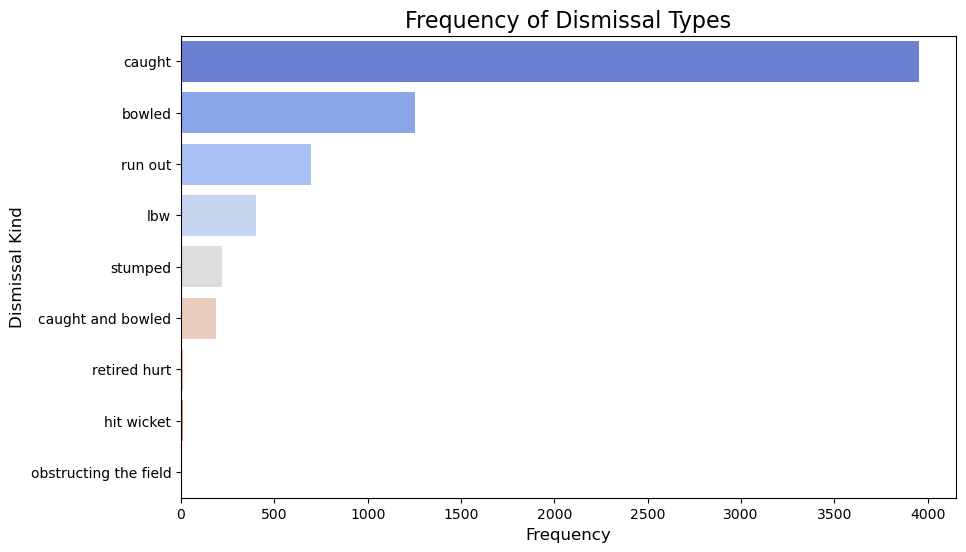

In [13]:
# Dismissal kinds frequency
dismissals = deliveries_df['dismissal_kind'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=dismissals.values, y=dismissals.index, palette="coolwarm")
plt.title("Frequency of Dismissal Types", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Dismissal Kind", fontsize=12)
plt.show()

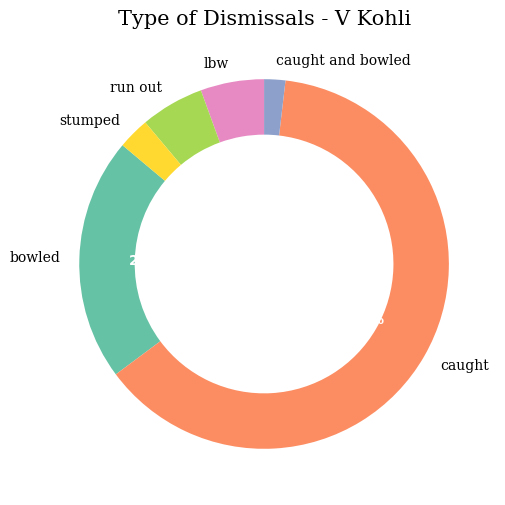

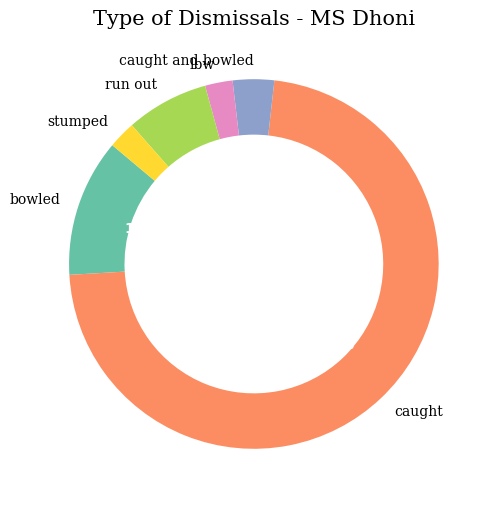

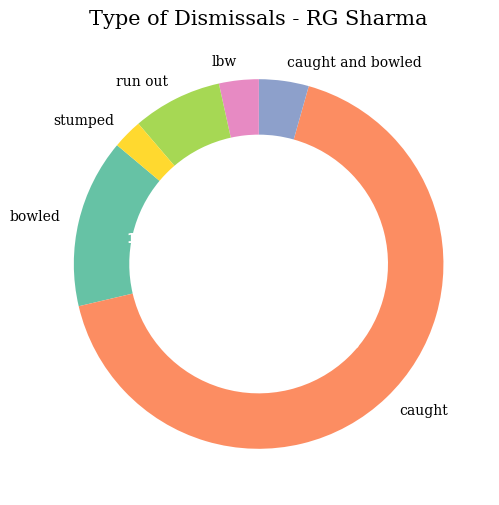

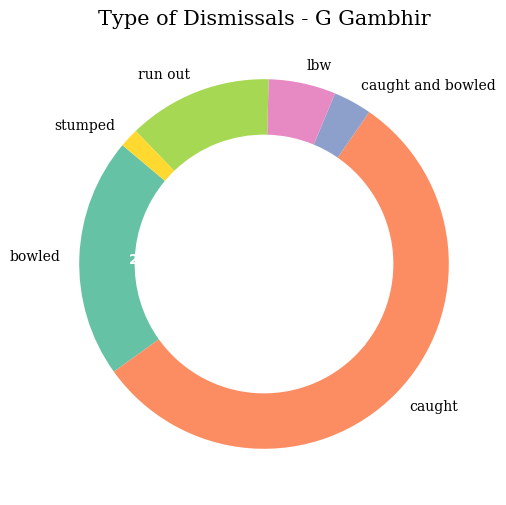

In [15]:
# Filter the data for specific players
filtered_df = deliveries_df[
    deliveries_df["player_dismissed"].isin(["V Kohli", "MS Dhoni", "RG Sharma", "G Gambhir"])
]

# Group by player_dismissed and dismissal_kind to calculate counts
grouped_data = (
    filtered_df.groupby(["player_dismissed", "dismissal_kind"])
    .size()
    .reset_index(name="type")
)

# Plot a donut chart for each player
players = ["V Kohli", "MS Dhoni", "RG Sharma", "G Gambhir"]

for player in players:
    player_data = grouped_data[grouped_data["player_dismissed"] == player]
    plt.figure(figsize=(6, 6))
    wedges, texts, autotexts = plt.pie(
        player_data["type"],
        labels=player_data["dismissal_kind"],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Set2.colors,
        wedgeprops=dict(width=0.3)  # Creates the "donut" effect
    )
    plt.setp(texts, size=10, fontfamily='serif')
    plt.setp(autotexts, size=10, fontweight="bold", color="white")
    plt.title(f"Type of Dismissals - {player}", fontsize=15, fontfamily='serif')
    plt.show()

<Figure size 1400x1000 with 0 Axes>

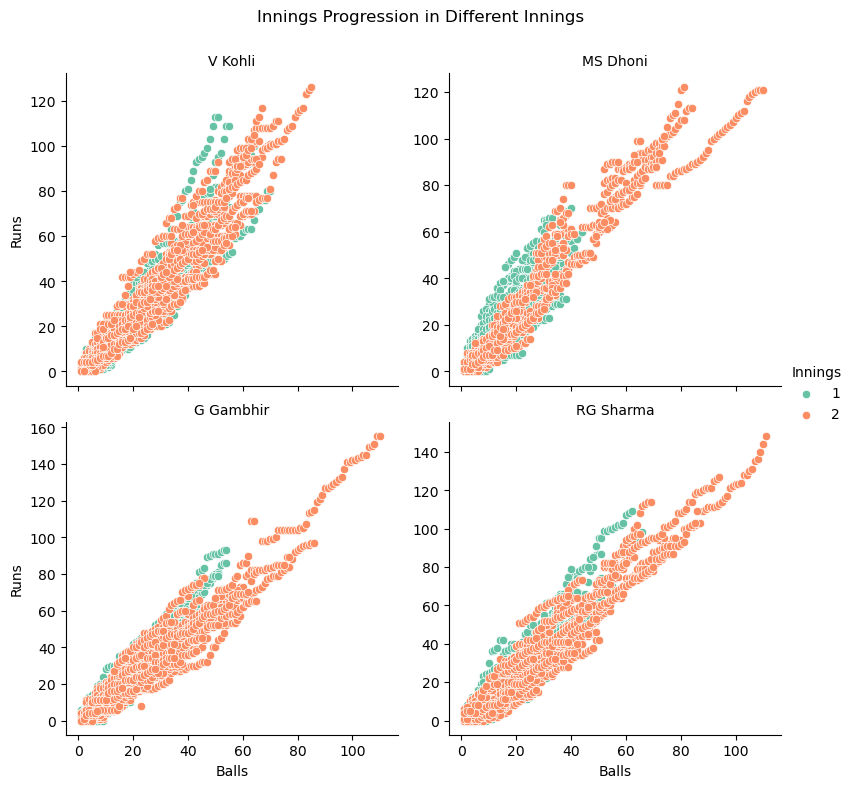

In [46]:
# Correct the merge using appropriate column mapping
merged_data = deliveries_df.merge(matches_df, left_on="match_id", right_on="id", how="left")

# Filter for specific batsmen
batsmen = ["V Kohli", "MS Dhoni", "RG Sharma", "G Gambhir"]
filtered_data = merged_data[merged_data["batsman"].isin(batsmen)]

# Group by match_id and calculate cumulative runs and balls faced
filtered_data = filtered_data[filtered_data["is_super_over"] == 0]
filtered_data["cum_run"] = filtered_data.groupby("match_id")["batsman_runs"].cumsum()
filtered_data["cum_ball"] = filtered_data.groupby("match_id").cumcount() + 1

# Plot innings progression for each batsman
plt.figure(figsize=(14, 10))
g = sns.FacetGrid(filtered_data, col="batsman", hue="inning", col_wrap=2, height=4, sharey=False, palette="Set2")
g.map(sns.scatterplot, "cum_ball", "cum_run")
g.set_axis_labels("Balls", "Runs")
g.add_legend(title="Innings")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Innings Progression in Different Innings")
plt.show()

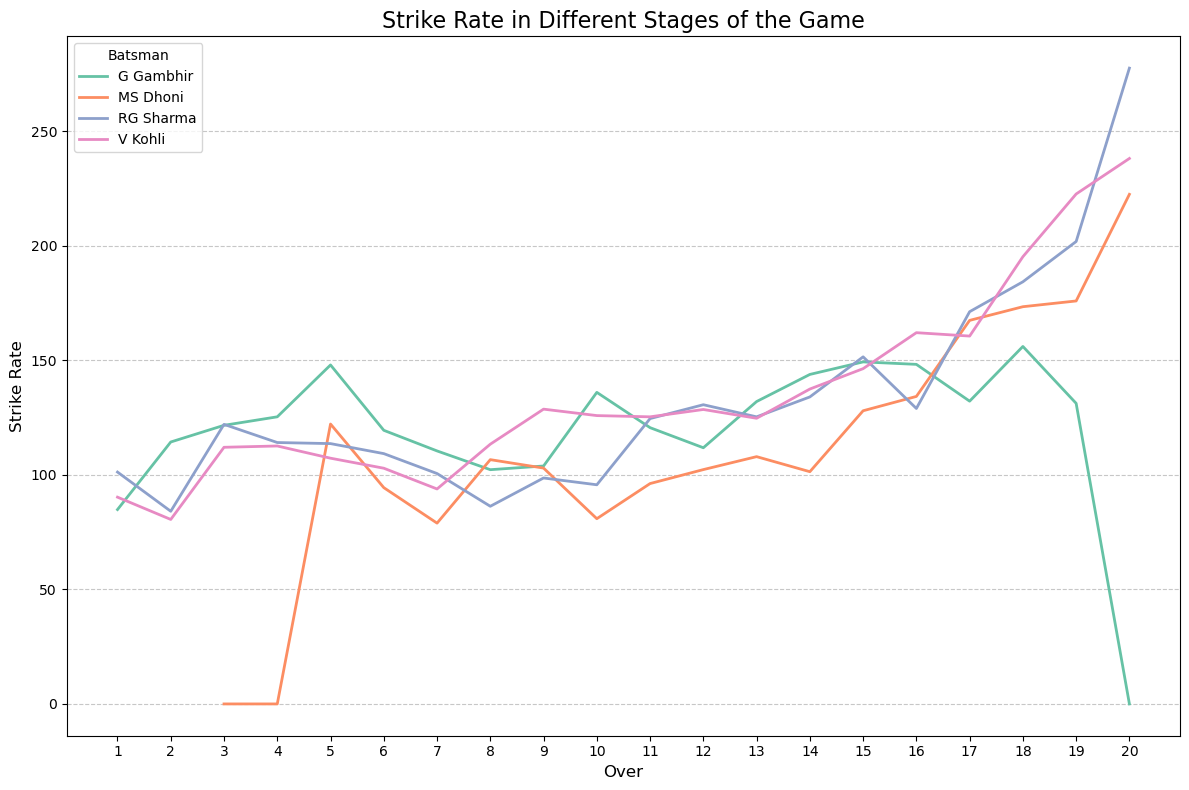

In [19]:
# Filter data for specific batsmen
batsmen = ["V Kohli", "MS Dhoni", "RG Sharma", "G Gambhir"]
filtered_data = deliveries_df[deliveries_df["batsman"].isin(batsmen)]

# Group data by batsman and over, calculate strike rate
grouped_data = (
    filtered_data.groupby(["batsman", "over"])
    .agg(strike=("batsman_runs", lambda x: x.mean() * 100))
    .reset_index()
)

# Plot strike rate trends for each batsman
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_data, x="over", y="strike", hue="batsman", linewidth=2, palette="Set2")
plt.title("Strike Rate in Different Stages of the Game", fontsize=16)
plt.xlabel("Over", fontsize=12)
plt.ylabel("Strike Rate", fontsize=12)
plt.xticks(range(1, 21))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Batsman", fontsize=10)
plt.tight_layout()
plt.show()


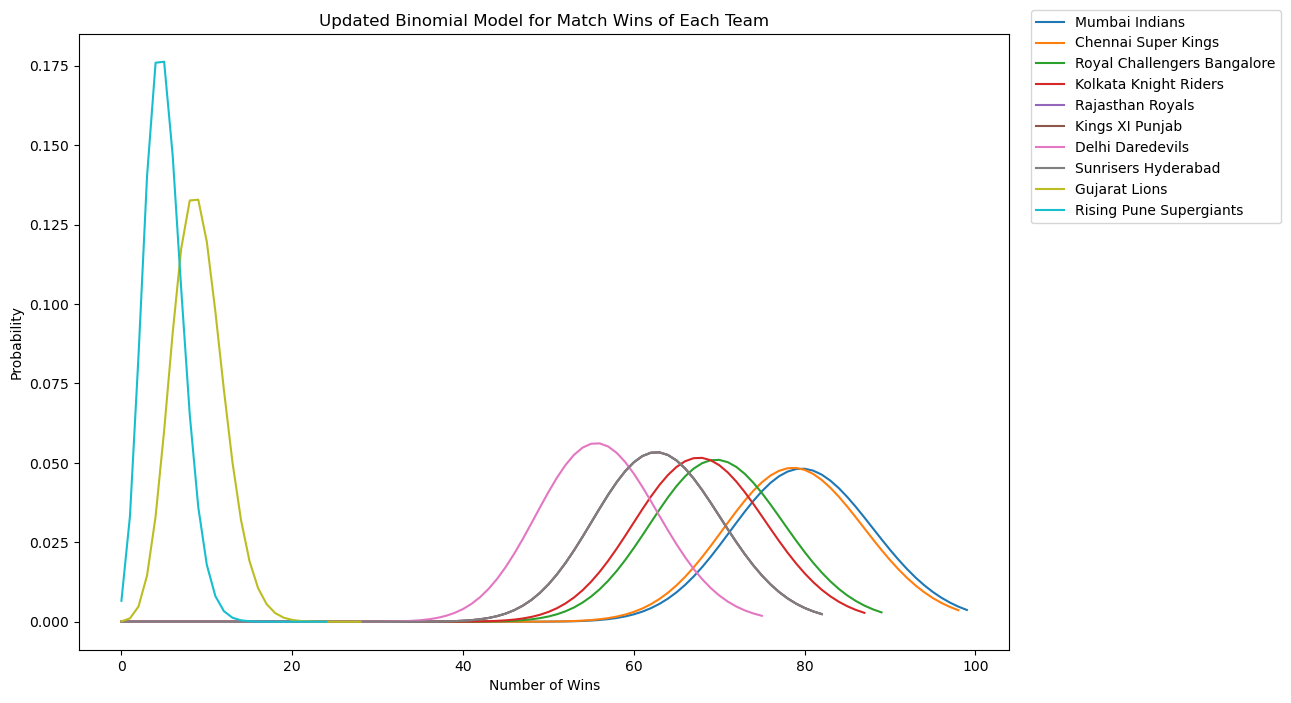

In [23]:
from scipy.stats import binom
import numpy as np

# Load the dataset (replace 'matches.csv' with your file path if needed)
matches_file_path = 'filtered_matches.csv'
matches_data = pd.read_csv(matches_file_path)

# Step 1: Calculate the total wins for each team
team_wins = matches_data['winner'].value_counts().reset_index()
team_wins.columns = ['team', 'wins']

# Step 2: Combine 'Deccan Chargers' with 'Sunrisers Hyderabad' and remove 'Pune Warriors' and 'Kochi Tuskers Kerala'
team_wins_combined = team_wins.copy()

# Merge Deccan Chargers into Sunrisers Hyderabad
if 'Deccan Chargers' in team_wins_combined['team'].values:
    sunrisers_wins = team_wins_combined.loc[team_wins_combined['team'] == 'Sunrisers Hyderabad', 'wins'].values[0]
    deccan_wins = team_wins_combined.loc[team_wins_combined['team'] == 'Deccan Chargers', 'wins'].values[0]
    team_wins_combined.loc[team_wins_combined['team'] == 'Sunrisers Hyderabad', 'wins'] = sunrisers_wins + deccan_wins
    team_wins_combined = team_wins_combined[team_wins_combined['team'] != 'Deccan Chargers']

# Remove Pune Warriors and Kochi Tuskers Kerala
teams_to_remove = ['Pune Warriors', 'Kochi Tuskers Kerala']
team_wins_combined = team_wins_combined[~team_wins_combined['team'].isin(teams_to_remove)]

# Reset index
team_wins_combined.reset_index(drop=True, inplace=True)

# Step 3: Build the Binomial model
updated_team_binomial_models = {}
updated_total_matches_played = team_wins_combined['wins'].sum()

for idx, row in team_wins_combined.iterrows():
    team = row['team']
    wins = row['wins']
    # Probability of winning for this team
    p_team = wins / updated_total_matches_played
    
    # Generate Binomial PMF
    x = np.arange(0, wins + 20)
    pmf = binom.pmf(x, updated_total_matches_played, p_team)
    
    # Store the updated team model
    updated_team_binomial_models[team] = (x, pmf)

# Step 4: Plot the Binomial model
plt.figure(figsize=(12, 8))

for team, (x, pmf) in updated_team_binomial_models.items():
    plt.plot(x, pmf, label=f"{team}")

plt.title("Updated Binomial Model for Match Wins of Each Team")
plt.xlabel("Number of Wins")
plt.ylabel("Probability")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.05))
plt.show()

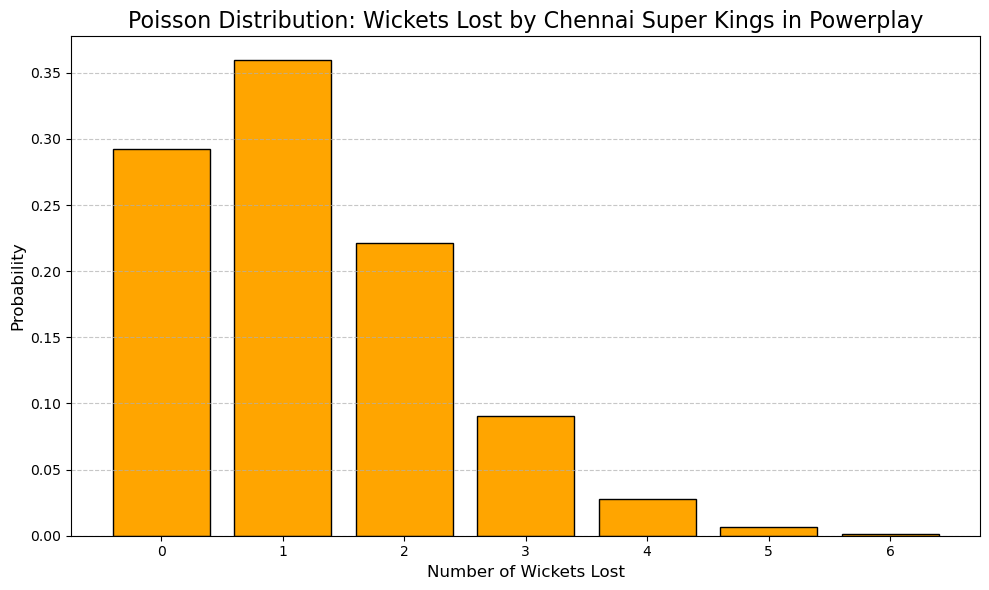

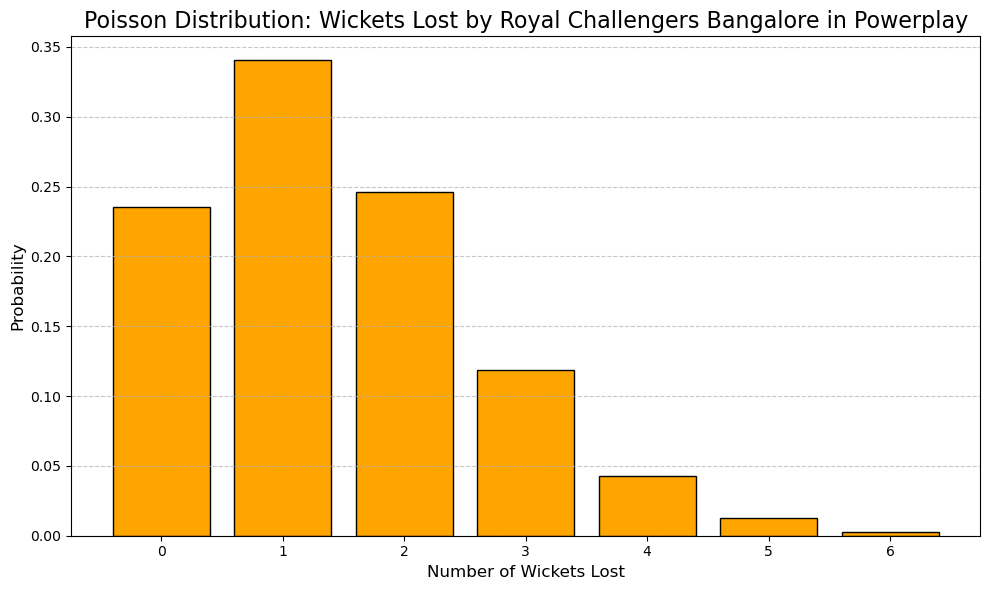

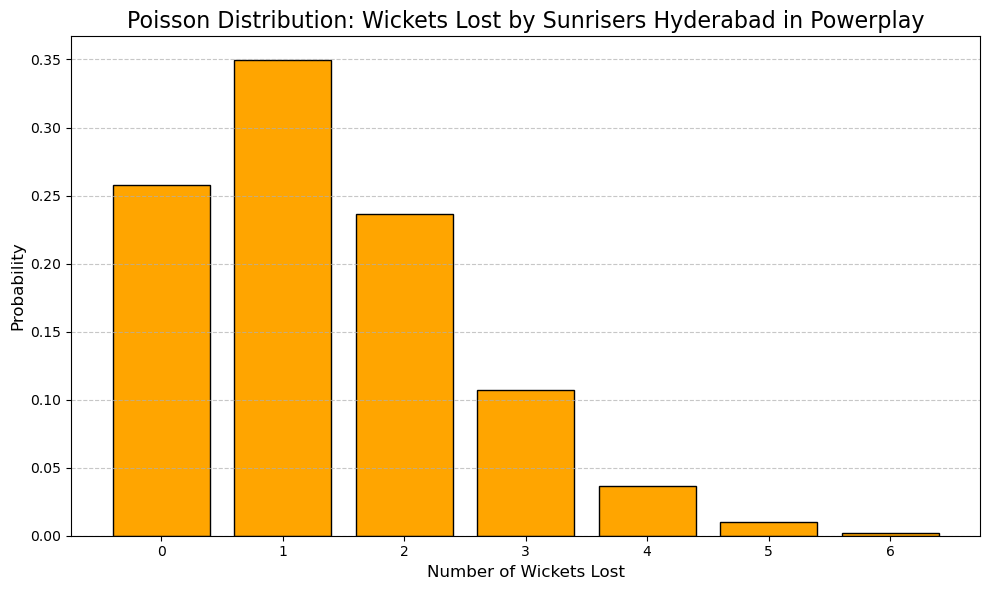

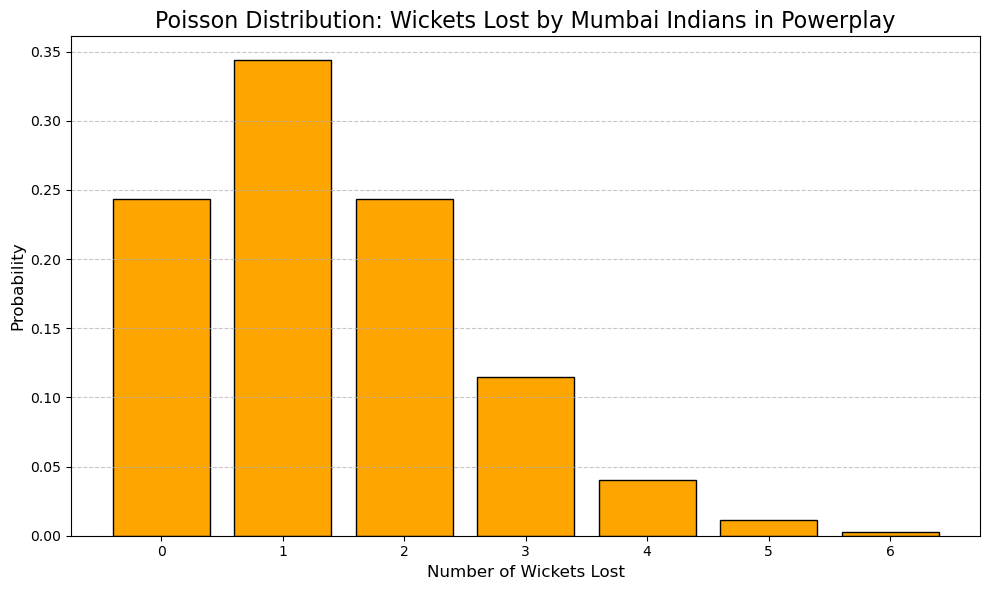

In [25]:
from scipy.stats import poisson
import tkinter as tk
from tkinter import simpledialog, messagebox

# Function to process data and plot Poisson distribution
def process_and_plot():
    # Get the team name from the input field
    team_name = team_entry.get()
    
    # Filter for matches where the team is batting and within the first 6 overs
    team_powerplay = deliveries_df[
        (deliveries_df['batting_team'] == team_name) & 
        (deliveries_df['over'] <= 6)
    ]

    # Check if the team has valid data
    if team_powerplay.empty:
        messagebox.showinfo("No Data", f"No data available for the team: {team_name}")
    else:
        # Count wickets lost in each match during the powerplay
        team_wickets_per_match = team_powerplay['player_dismissed'].notnull().groupby(team_powerplay['match_id']).sum()

        # Calculate the average number of wickets lost (λ)
        lambda_wickets = team_wickets_per_match.mean()

        # Generate Poisson probabilities
        x = np.arange(0, 7)  # Possible outcomes: 0 to 6 wickets
        poisson_probs = poisson.pmf(x, lambda_wickets)

        # Plot the Poisson distribution
        plt.figure(figsize=(10, 6))
        plt.bar(x, poisson_probs, color='orange', edgecolor='black')
        plt.title(f'Poisson Distribution: Wickets Lost by {team_name} in Powerplay', fontsize=16)
        plt.xlabel('Number of Wickets Lost', fontsize=12)
        plt.ylabel('Probability', fontsize=12)
        plt.xticks(x, fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        # Show average wickets lost
        messagebox.showinfo(
            "Average Wickets",
            f"Average number of wickets lost by {team_name} in the first 6 overs (λ): {lambda_wickets:.2f}"
        )

# Load the deliveries dataset
data_path = 'filtered_deliveries.csv'  # Replace with your dataset path
deliveries_df = pd.read_csv(data_path)

# Set up the GUI window
root = tk.Tk()
root.title("Poisson Distribution: Powerplay Analysis")

# Add input field and button
tk.Label(root, text="Enter Team Name:", font=("Arial", 12)).pack(pady=10)
team_entry = tk.Entry(root, width=30, font=("Arial", 12))
team_entry.pack(pady=5)
submit_button = tk.Button(root, text="Analyze", command=process_and_plot, font=("Arial", 12))
submit_button.pack(pady=20)

# Run the GUI event loop
root.mainloop()

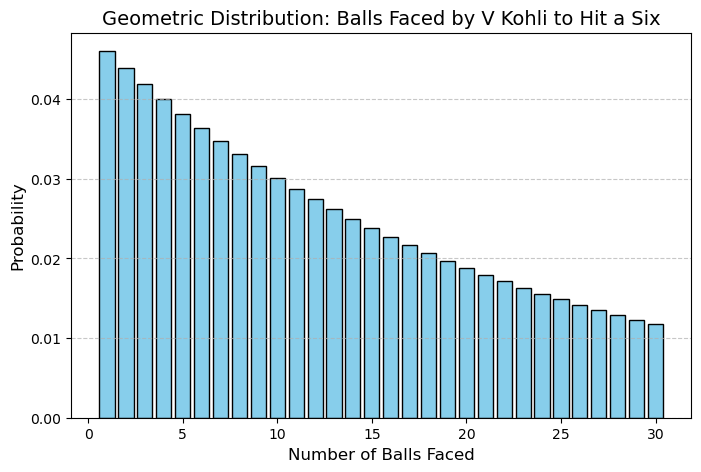

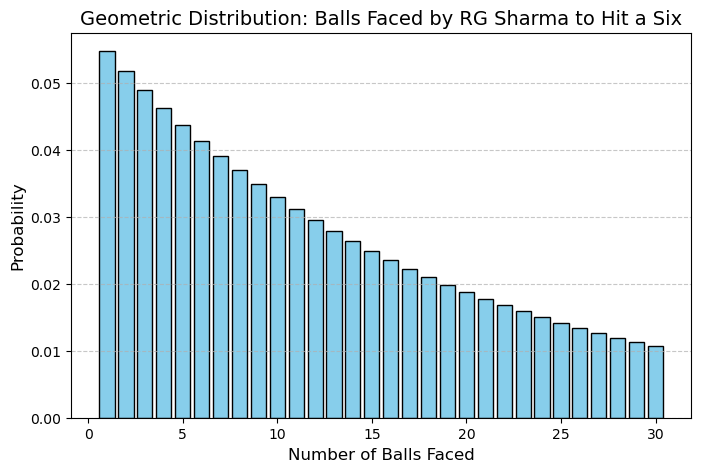

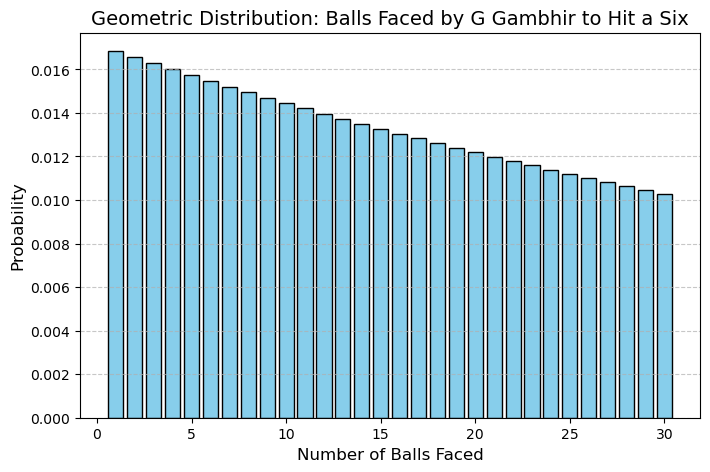

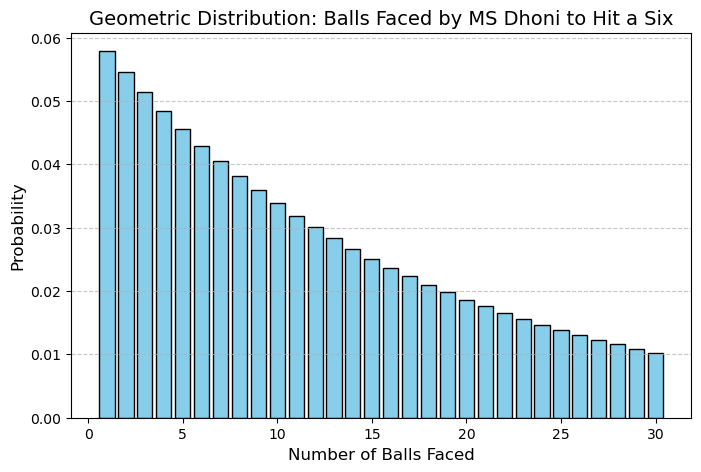

In [26]:
from scipy.stats import geom
from tkinter import Tk, Label, Entry, Button, Frame
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


data = deliveries_df

# Function to handle player input and display the result
def calculate_probability():
    player_name = entry.get()
    player_data = data[data['batsman'] == player_name]

    # Clear previous plot
    for widget in plot_frame.winfo_children():
        widget.destroy()

    if player_data.empty:
        result_label.config(text=f"No data available for player: {player_name}")
    else:
        total_sixes = (player_data['batsman_runs'] == 6).sum()
        total_balls = player_data.shape[0]

        if total_balls == 0:
            result_label.config(text=f"No balls faced by {player_name}. Cannot calculate probability.")
        else:
            # Calculate probability of hitting a six
            p = total_sixes / total_balls
            x = range(1, 31)  # Possible outcomes (1 to 30 balls faced)
            geometric_probs = geom.pmf(x, p)

            # Create a Matplotlib figure
            fig, ax = plt.subplots(figsize=(8, 5))
            ax.bar(x, geometric_probs, color='skyblue', edgecolor='black')
            ax.set_title(f'Geometric Distribution: Balls Faced by {player_name} to Hit a Six', fontsize=14)
            ax.set_xlabel('Number of Balls Faced', fontsize=12)
            ax.set_ylabel('Probability', fontsize=12)
            ax.grid(axis='y', linestyle='--', alpha=0.7)

            # Embed the plot in Tkinter GUI
            canvas = FigureCanvasTkAgg(fig, master=plot_frame)
            canvas.draw()
            canvas.get_tk_widget().pack()

            # Update result label
            result_label.config(text=f"Probability of {player_name} hitting a six: {p:.4f}")

# GUI setup
root = Tk()
root.title("Geometric Distribution Calculator")

# Input and Result Widgets
Label(root, text="Enter Player Name:").grid(row=0, column=0, padx=10, pady=10)
entry = Entry(root, width=30)
entry.grid(row=0, column=1, padx=10, pady=10)
Button(root, text="Calculate", command=calculate_probability).grid(row=1, column=0, columnspan=2, pady=10)
result_label = Label(root, text="", wraplength=400, justify="center")
result_label.grid(row=2, column=0, columnspan=2, pady=10)

# Frame for the Plot
plot_frame = Frame(root)
plot_frame.grid(row=3, column=0, columnspan=2, pady=10)

# Run the GUI
root.mainloop()

Mean win margin by runs (bootstrap): 30.26
95% confidence interval (bootstrap): (26.50, 33.72)


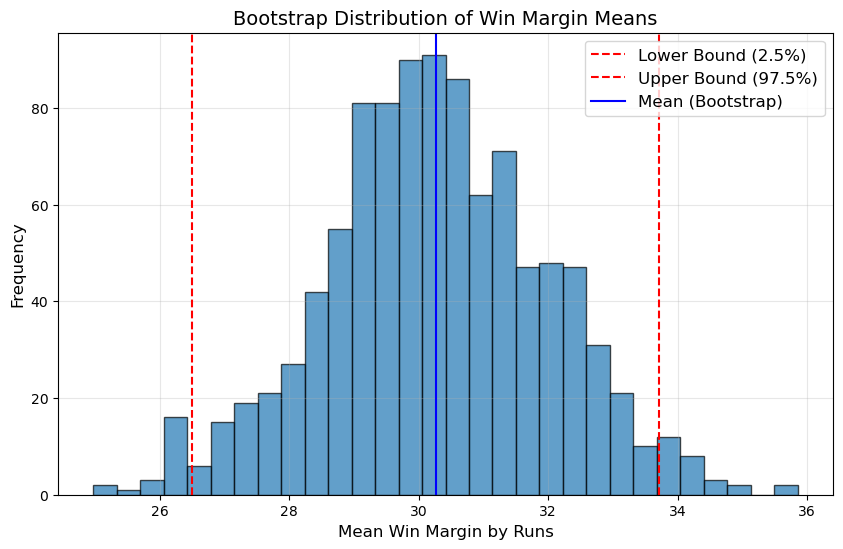

In [29]:
# Extract the win margin (runs) for matches that were won by runs (not by wickets)
win_margin_runs = matches_df['win_by_runs'][matches_df['win_by_runs'] > 0]

# Set a seed for reproducibility
np.random.seed(42)

# Number of bootstrap samples
n_bootstrap_samples = 1000
bootstrap_means = []

# Generate bootstrap samples and compute their means
for _ in range(n_bootstrap_samples):
    bootstrap_sample = np.random.choice(win_margin_runs, size=len(win_margin_runs), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate the 95% confidence interval from the bootstrap samples
bootstrap_confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Calculate the mean from the bootstrap samples
mean_bootstrap = np.mean(bootstrap_means)

# Print the results
print(f"Mean win margin by runs (bootstrap): {mean_bootstrap:.2f}")
print(f"95% confidence interval (bootstrap): ({bootstrap_confidence_interval[0]:.2f}, {bootstrap_confidence_interval[1]:.2f})")

# Plot the bootstrap means distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(bootstrap_confidence_interval[0], color='red', linestyle='--', label='Lower Bound (2.5%)')
plt.axvline(bootstrap_confidence_interval[1], color='red', linestyle='--', label='Upper Bound (97.5%)')
plt.axvline(mean_bootstrap, color='blue', linestyle='-', label='Mean (Bootstrap)')
plt.title('Bootstrap Distribution of Win Margin Means', fontsize=14)
plt.xlabel('Mean Win Margin by Runs', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Hypothesis 1: Is winning the toss an advantage?

Null Hypothesis (
H
0
​	
 ):
The proportion of matches won by the team after winning the toss is equal to the proportion of matches won by the team after losing the toss.


Alternative Hypothesis (
H
a):
The proportion of matches won by the team after winning the toss is not equal to the proportion of matches won by the team after losing the toss.

In [32]:
from statsmodels.stats.proportion import proportions_ztest

# Filter matches involving CSK
csk_matches = matches_df[(matches_df['team1'] == 'Chennai Super Kings') | (matches_df['team2'] == 'Chennai Super Kings')]

# Determine matches CSK won
csk_wins = csk_matches[csk_matches['winner'] == 'Chennai Super Kings']

# Count matches where CSK won the toss and won the match
csk_wins_toss = csk_wins[csk_wins['toss_winner'] == 'Chennai Super Kings']

# Count matches where CSK lost the toss and won the match
csk_loses_toss = csk_wins[csk_wins['toss_winner'] != 'Chennai Super Kings']

# Total matches where CSK won/lost toss
csk_total_toss_wins = csk_matches[csk_matches['toss_winner'] == 'Chennai Super Kings'].shape[0]
csk_total_toss_loses = csk_matches[csk_matches['toss_winner'] != 'Chennai Super Kings'].shape[0]

# Input for Z-test
count = [csk_wins_toss.shape[0], csk_loses_toss.shape[0]]  # Number of successes (wins)
nobs = [csk_total_toss_wins, csk_total_toss_loses]  # Number of trials (matches)

# Perform the two-proportion z-test
z_stat, p_value = proportions_ztest(count, nobs)

# Display results



print("Chennai Supper Kings Toss-Win Analysis:")
print(f"Matches Won After Toss Wins: {count[0]}")
print(f"Total Matches After Toss Wins: {nobs[0]}")
print(f"Proportion of Wins (Toss Wins): {count[0] / nobs[0]:.4f}")
print(f"Matches Won After Toss Losses: {count[1]}")
print(f"Total Matches After Toss Losses: {nobs[1]}")
print(f"Proportion of Wins (Toss Losses): {count[1] / nobs[1]:.4f}")
print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Result: Reject the null hypothesis (Significant difference in proportions).")
else:
    print("Result: Fail to reject the null hypothesis (No significant difference in proportions).")

Chennai Supper Kings Toss-Win Analysis:
Matches Won After Toss Wins: 42
Total Matches After Toss Wins: 66
Proportion of Wins (Toss Wins): 0.6364
Matches Won After Toss Losses: 37
Total Matches After Toss Losses: 65
Proportion of Wins (Toss Losses): 0.5692
Z-Statistic: 0.7852
P-Value: 0.4323
Result: Fail to reject the null hypothesis (No significant difference in proportions).


In [34]:
# Filter matches involving Mumbai Indians
mi_matches = matches_df[(matches_df['team1'] == 'Mumbai Indians') | (matches_df['team2'] == 'Mumbai Indians')]

# Determine matches MI won
mi_wins = mi_matches[mi_matches['winner'] == 'Mumbai Indians']

# Count matches where MI won the toss and won the match
mi_wins_toss = mi_wins[mi_wins['toss_winner'] == 'Mumbai Indians']

# Count matches where MI lost the toss and won the match
mi_loses_toss = mi_wins[mi_wins['toss_winner'] != 'Mumbai Indians']

# Total matches where MI won/lost toss
mi_total_toss_wins = mi_matches[mi_matches['toss_winner'] == 'Mumbai Indians'].shape[0]
mi_total_toss_loses = mi_matches[mi_matches['toss_winner'] != 'Mumbai Indians'].shape[0]

# Input for Z-test
count_mi = [mi_wins_toss.shape[0], mi_loses_toss.shape[0]]  # Number of successes (wins)
nobs_mi = [mi_total_toss_wins, mi_total_toss_loses]  # Number of trials (matches)

# Perform the two-proportion z-test for MI
z_stat_mi, p_value_mi = proportions_ztest(count_mi, nobs_mi)

# Display results
print("Mumbai Indians Toss-Win Analysis:")
print(f"Matches Won After Toss Wins: {count_mi[0]}")
print(f"Total Matches After Toss Wins: {nobs_mi[0]}")
print(f"Proportion of Wins (Toss Wins): {count_mi[0] / nobs_mi[0]:.4f}")
print(f"Matches Won After Toss Losses: {count_mi[1]}")
print(f"Total Matches After Toss Losses: {nobs_mi[1]}")
print(f"Proportion of Wins (Toss Losses): {count_mi[1] / nobs_mi[1]:.4f}")
print(f"Z-Statistic: {z_stat_mi:.4f}")
print(f"P-Value: {p_value_mi:.4f}")

# Interpretation
if p_value_mi < 0.05:
    print("Result: Reject the null hypothesis (Significant difference in proportions).")
else:
    print("Result: Fail to reject the null hypothesis (No significant difference in proportions).")


Mumbai Indians Toss-Win Analysis:
Matches Won After Toss Wins: 41
Total Matches After Toss Wins: 74
Proportion of Wins (Toss Wins): 0.5541
Matches Won After Toss Losses: 39
Total Matches After Toss Losses: 66
Proportion of Wins (Toss Losses): 0.5909
Z-Statistic: -0.4399
P-Value: 0.6600
Result: Fail to reject the null hypothesis (No significant difference in proportions).


In [36]:
# Filter matches involving RCB
rcb_matches = matches_df[(matches_df['team1'] == 'Royal Challengers Bangalore') | (matches_df['team2'] == 'Royal Challengers Bangalore')]

# Determine matches RCB won
rcb_wins = rcb_matches[rcb_matches['winner'] == 'Royal Challengers Bangalore']

# Count matches where RCB won the toss and won the match
rcb_wins_toss = rcb_wins[rcb_wins['toss_winner'] == 'Royal Challengers Bangalore']

# Count matches where RCB lost the toss and won the match
rcb_loses_toss = rcb_wins[rcb_wins['toss_winner'] != 'Royal Challengers Bangalore']

# Total matches where RCB won/lost toss
rcb_total_toss_wins = rcb_matches[rcb_matches['toss_winner'] == 'Royal Challengers Bangalore'].shape[0]
rcb_total_toss_loses = rcb_matches[rcb_matches['toss_winner'] != 'Royal Challengers Bangalore'].shape[0]

# Input for Z-test
count_rcb = [rcb_wins_toss.shape[0], rcb_loses_toss.shape[0]]  # Number of wins after winning and losing toss
nobs_rcb = [rcb_total_toss_wins, rcb_total_toss_loses]  # Total matches after winning and losing toss

# Perform the two-proportion z-test for RCB
z_stat_rcb, p_value_rcb = proportions_ztest(count_rcb, nobs_rcb)

# Display results
print("Royal Challengers Bangalore Toss-Win Analysis:")
print(f"Matches Won After Toss Wins: {count_rcb[0]}")
print(f"Total Matches After Toss Wins: {nobs_rcb[0]}")
print(f"Proportion of Wins (Toss Wins): {count_rcb[0] / nobs_rcb[0]:.4f}")
print(f"Matches Won After Toss Losses: {count_rcb[1]}")
print(f"Total Matches After Toss Losses: {nobs_rcb[1]}")
print(f"Proportion of Wins (Toss Losses): {count_rcb[1] / nobs_rcb[1]:.4f}")
print(f"Z-Statistic: {z_stat_rcb:.4f}")
print(f"P-Value: {p_value_rcb:.4f}")

# Interpretation
if p_value_rcb < 0.05:
    print("Result: Reject the null hypothesis (Significant difference in proportions).")
else:
    print("Result: Fail to reject the null hypothesis (No significant difference in proportions).")

Royal Challengers Bangalore Toss-Win Analysis:
Matches Won After Toss Wins: 33
Total Matches After Toss Wins: 61
Proportion of Wins (Toss Wins): 0.5410
Matches Won After Toss Losses: 37
Total Matches After Toss Losses: 78
Proportion of Wins (Toss Losses): 0.4744
Z-Statistic: 0.7796
P-Value: 0.4356
Result: Fail to reject the null hypothesis (No significant difference in proportions).


In [38]:
# Filter matches involving Sunrisers Hyderabad (SRH)
srh_matches = matches_df[(matches_df['team1'] == 'Sunrisers Hyderabad') | (matches_df['team2'] == 'Sunrisers Hyderabad')]

# Determine matches SRH won
srh_wins = srh_matches[srh_matches['winner'] == 'Sunrisers Hyderabad']

# Count matches where SRH won the toss and won the match
srh_wins_toss = srh_wins[srh_wins['toss_winner'] == 'Sunrisers Hyderabad']

# Count matches where SRH lost the toss and won the match
srh_loses_toss = srh_wins[srh_wins['toss_winner'] != 'Sunrisers Hyderabad']

# Total matches where SRH won/lost toss
srh_total_toss_wins = srh_matches[srh_matches['toss_winner'] == 'Sunrisers Hyderabad'].shape[0]
srh_total_toss_loses = srh_matches[srh_matches['toss_winner'] != 'Sunrisers Hyderabad'].shape[0]

# Input for Z-test
count_srh = [srh_wins_toss.shape[0], srh_loses_toss.shape[0]]  # Number of wins after winning and losing toss
nobs_srh = [srh_total_toss_wins, srh_total_toss_loses]  # Total matches after winning and losing toss

# Perform the two-proportion z-test for SRH
z_stat_srh, p_value_srh = proportions_ztest(count_srh, nobs_srh)

# Display results
print("Sunrisers Hyderabad Toss-Win Analysis:")
print(f"Matches Won After Toss Wins: {count_srh[0]}")
print(f"Total Matches After Toss Wins: {nobs_srh[0]}")
print(f"Proportion of Wins (Toss Wins): {count_srh[0] / nobs_srh[0]:.4f}")
print(f"Matches Won After Toss Losses: {count_srh[1]}")
print(f"Total Matches After Toss Losses: {nobs_srh[1]}")
print(f"Proportion of Wins (Toss Losses): {count_srh[1] / nobs_srh[1]:.4f}")
print(f"Z-Statistic: {z_stat_srh:.4f}")
print(f"P-Value: {p_value_srh:.4f}")

# Interpretation
if p_value_srh < 0.05:
    print("Result: Reject the null hypothesis (Significant difference in proportions).")
else:
    print("Result: Fail to reject the null hypothesis (No significant difference in proportions).")

Sunrisers Hyderabad Toss-Win Analysis:
Matches Won After Toss Wins: 14
Total Matches After Toss Wins: 30
Proportion of Wins (Toss Wins): 0.4667
Matches Won After Toss Losses: 20
Total Matches After Toss Losses: 32
Proportion of Wins (Toss Losses): 0.6250
Z-Statistic: -1.2519
P-Value: 0.2106
Result: Fail to reject the null hypothesis (No significant difference in proportions).


In [42]:
# Merge deliveries and matches data on match_id
deliveries_with_matches = pd.merge(deliveries_df, matches_df[['id', 'winner', 'season']], left_on='match_id', right_on='id', how='inner')

# Rename columns for clarity
deliveries_with_matches.rename(columns={'winner': 'match_winner', 'season': 'year'}, inplace=True)

In [44]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
# Powerplay runs (overs 1-6)
powerplay_runs = deliveries_with_matches[(deliveries_with_matches['over'] <= 6)].groupby('match_id')['total_runs'].sum()

# Merge powerplay runs with match outcomes
match_powerplay = pd.merge(powerplay_runs, matches_df[['id', 'winner']], left_index=True, right_on='id', how='inner')
match_powerplay['High_Powerplay_Runs'] = match_powerplay['total_runs'] >= match_powerplay['total_runs'].median()

# Chi-square test for powerplay runs
contingency_table_powerplay = pd.crosstab(match_powerplay['High_Powerplay_Runs'], match_powerplay['winner'])
chi2_stat_powerplay, p_value_powerplay, _, _ = chi2_contingency(contingency_table_powerplay)

print(contingency_table_powerplay)
val=stats.chi2_contingency(contingency_table_powerplay)
print(val)
print("Powerplay Runs Impact:")
print(f"Chi2 Statistic: {chi2_stat_powerplay}")
print(f"P-Value: {p_value_powerplay}")

winner               Chennai Super Kings  Deccan Chargers  Delhi Daredevils  \
High_Powerplay_Runs                                                           
False                                 35               17                24   
True                                  44               12                32   

winner               Gujarat Lions  Kings XI Punjab  Kochi Tuskers Kerala  \
High_Powerplay_Runs                                                         
False                            2               26                     2   
True                             7               37                     4   

winner               Kolkata Knight Riders  Mumbai Indians  Pune Warriors  \
High_Powerplay_Runs                                                         
False                                   38              40              8   
True                                    30              40              4   

winner               Rajasthan Royals  Rising Pune Supergiants  \